In [1]:
import torch 
from torch import nn  
from d2l import torch as d2l

In [2]:
def corr2d(X,K):
    h,w = K.shape
    Y=torch.zeros((X.shape[0]-h+1,X.shape[1]-w+1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h,j:j+w] * K).sum()
    return Y

In [3]:
X = torch.tensor([[0.0,1.0,2.0],[3.,4.,5.],[6.,7.,8.]])
K = torch.tensor([[0.0,1.0],[2.0,3.0]])
corr2d(X,K)

tensor([[19., 25.],
        [37., 43.]])

In [4]:
class Conv2d(nn.Module):
    def __init__(self,kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    def forward(self,x):
        return corr2d(x,self.weight)+self.bias

In [5]:
X=torch.ones((6,8))
X[:,2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [6]:
K = torch.tensor([[1.0,-1.0]])
Y = corr2d(X,K)



tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [19]:
#构造一个二维卷积层，它具有一个输出通道和人形状为（1，2）的卷积核
conv2d = nn.Conv2d(1,1,kernel_size=(1,2),bias=False)
X = X.reshape((1,1,6,8))
Y = Y.reshape((1,1,6,7))
lr=3e-2

for i in range(20):
    Y_hat = conv2d(X)
    l=(Y_hat-Y)**2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= lr*conv2d.weight.grad
    if (i+1)%2 ==0 :
        print(f"epoch{i+1},loss {l.sum():.3f}")

epoch2,loss 2.465
epoch4,loss 0.529
epoch6,loss 0.136
epoch8,loss 0.042
epoch10,loss 0.015
epoch12,loss 0.006
epoch14,loss 0.002
epoch16,loss 0.001
epoch18,loss 0.000
epoch20,loss 0.000


In [20]:
conv2d.weight.data.reshape((1,2))

tensor([[ 1.0012, -0.9986]])

In [24]:
import torch 
from torch import nn

def comp_conv2d(conv2d,X):
    X=X.reshape((1,1)+X.shape)
    Y=conv2d(X)
    return Y.reshape(Y.shape[2:])
conv2d=nn.Conv2d(1,1,kernel_size=3,padding=1)
X = torch.rand(size=(8,8))
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

In [25]:
conv2d = nn.Conv2d(1,1,kernel_size=(5,3),padding=(2,1))
comp_conv2d(conv2d,X).shape

torch.Size([8, 8])

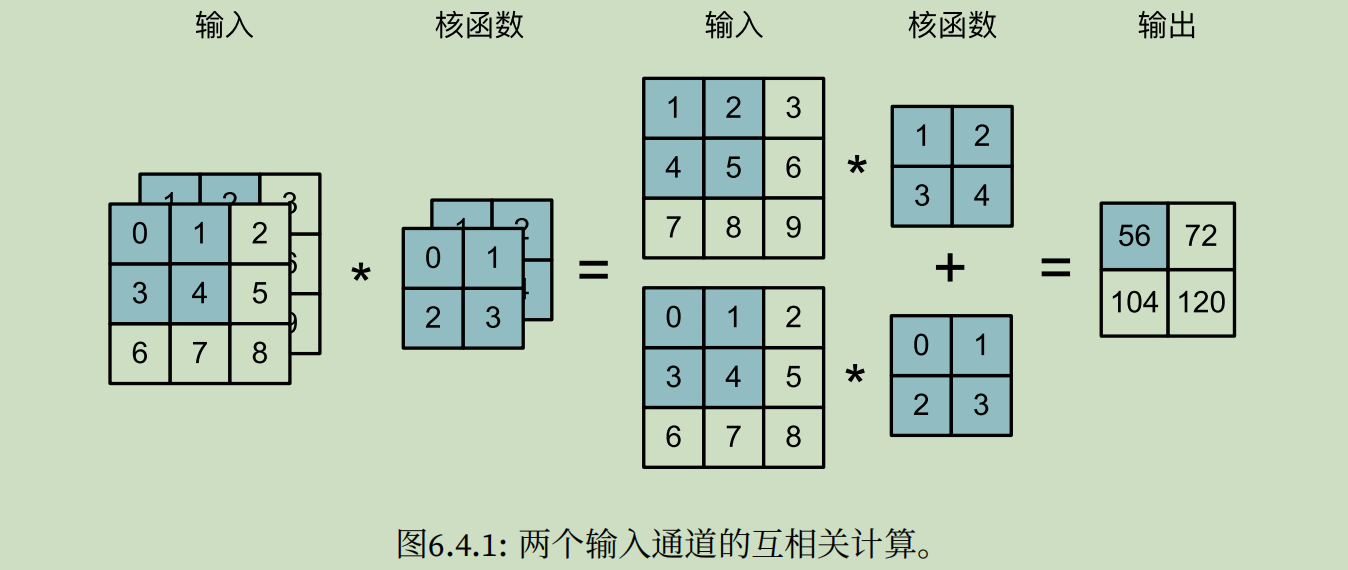


In [56]:
from torch import nn 
from d2l import torch as d2l

def corr2d_multi_in(X,K):
    #先遍历X，K的第0个通道，再加起来
    return sum(d2l.corr2d(x,k) for x,k in zip(X,K))
X=torch.tensor([[[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]],
               [[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,9.0]]])
K=torch.tensor([[[0.0,1.0],[2.0,3.0]],[[1.0,2.0],[3.0,4.0]]])
corr2d_multi_in(X,K)
# for x,k in zip(X,K):
#     print(x,k)

tensor([[ 56.,  72.],
        [104., 120.]])

In [57]:
def corr2d_multi_in_out(X,K):
    #迭代K的第0对个维度，每次都对输入x执行互相更换运算
    #最后将所有的结果叠加在一起
    return torch.stack([corr2d_multi_in(X,k) for k in K],0)
K=torch.stack((K,K+1,K+2),0)
corr2d_multi_in_out(X,K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])